In [26]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

path = "C:/Users/samue/Documents/MOOCs/Data Challenge Titanic/"

# Arbres de décision

In [12]:
test_df = pd.read_csv(path+'test.csv')
test_df = test_df.drop(["Name", "Ticket", "Cabin"], axis=1)
test_df = test_df.dropna()
X_test = pd.get_dummies(X_train)

In [13]:
train_df = pd.read_csv(path+'train.csv')

train_df = train_df.drop(["Name", "Ticket", "Cabin"], axis=1)
train_df = train_df.dropna()

y_train = train_df.Survived
y_train = pd.get_dummies(y_train)

X_train = train_df.drop(["Survived"], axis=1)
X_train = pd.get_dummies(X_train)

In [14]:
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [15]:
clf = RandomForestClassifier(random_state = 0, n_estimators = 80, max_depth = 15, min_samples_split = 4)

X_arr = X_train_train.to_numpy()
y_arr = y_train_train.to_numpy()

clf = clf.fit(X_arr,y_arr)

y_train_prob = clf.predict(X_train_test)
y_train_pred = y_train_prob.argmax(axis=-1)
y_train_test_final = y_train_test.to_numpy().argmax(axis=1) 

accuracy_score(y_train_pred,y_train_test_final)

0.7914893617021277

In [16]:
confusion_matrix(y_train_pred,y_train_test_final)

array([[115,  28],
       [ 21,  71]], dtype=int64)

In [22]:
train_df = pd.read_csv(path+'train.csv')
#train_df = train_df.drop(["PassengerId"], axis=1)
train_df = train_df.drop(["Name", "Ticket", "Cabin"], axis=1)

y_train = train_df.Survived
y_train = pd.get_dummies(y_train)

X_train_df = train_df.drop(["Survived"], axis=1)
X_train_df = pd.get_dummies(X_train_df)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train_df.to_numpy())

X_train = imp.transform(X_train_df.to_numpy())

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

RF = RandomForestClassifier(random_state = 0, n_estimators = 38, max_depth = 15, min_samples_split = 4)

X_arr = X_train_train
y_arr = y_train_train

RF = RF.fit(X_arr,y_arr)

y_train_prob = RF.predict(X_train_test)
y_train_pred = y_train_prob.argmax(axis=-1)
y_train_test_final = y_train_test.to_numpy().argmax(axis=1) 

accuracy_score(y_train_pred,y_train_test_final)

0.8372881355932204

In [18]:
importances = list(RF.feature_importances_)
for k in range(len(importances)):
    print(importances[k],X_train_df.columns[k])

0.1528466471200142 PassengerId
0.09628345223802694 Pclass
0.16733847688183526 Age
0.034164756127130234 SibSp
0.028543365587763925 Parch
0.18148215778578297 Fare
0.14036508707708953 Sex_female
0.15486418321443032 Sex_male
0.0196330164718901 Embarked_C
0.006402320498541954 Embarked_Q
0.018076536997494543 Embarked_S


C:\Users\samue\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\samue\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


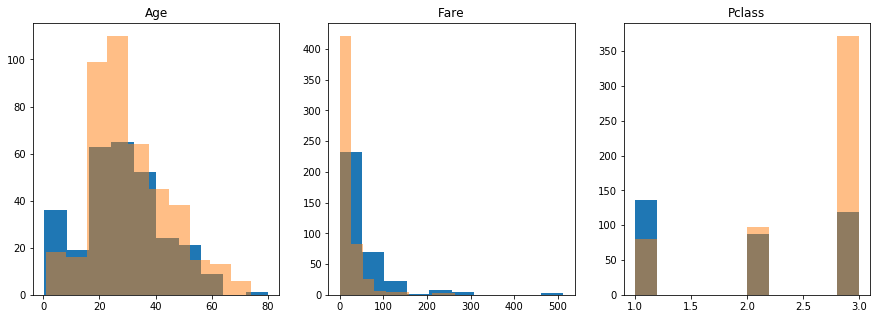

In [19]:
train_df = pd.read_csv(path+'train.csv')

survivants = train_df['Survived'] == 1
morts = train_df['Survived'] == 0

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(train_df[survivants]['Age'].to_numpy())
plt.hist(train_df[morts]['Age'].to_numpy(), alpha = .5)
plt.title('Age')

plt.subplot(1,3,2)
plt.hist(train_df[survivants]['Fare'].to_numpy())
plt.hist(train_df[morts]['Fare'].to_numpy(), alpha = .5)
plt.title('Fare')

plt.subplot(1,3,3)
plt.hist(train_df[survivants]['Pclass'].to_numpy())
plt.hist(train_df[morts]['Pclass'].to_numpy(), alpha = .5)
plt.title('Pclass');

In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
train_df = pd.read_csv(path+'train.csv')
#train_df = train_df.drop(["PassengerId"], axis=1)
train_df = train_df.drop(["Name", "Ticket", "Cabin"], axis=1)

y_train = train_df.Survived
y_train = pd.get_dummies(y_train)

X_train_df = train_df.drop(["Survived"], axis=1)
X_train_df = pd.get_dummies(X_train_df)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train_df.to_numpy())

X_train = imp.transform(X_train_df.to_numpy())
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

RF = RandomForestClassifier(random_state = 0, n_estimators = 38, max_depth = 15, min_samples_split = 4)

kf = KFold(n_splits=3,random_state=50,shuffle=True)
split = kf.split(X_train_train)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

GS_RF = GridSearchCV(RF, 
                     param_grid = parameters,
                     scoring = make_scorer(accuracy_score),
                     n_jobs=-1, 
                     cv = split, 
                     iid = True)

X_arr = X_train_train
y_arr = y_train_train

GS_RF = GS_RF.fit(X_arr,y_arr)
GS_RF_best_estimator = GS_RF.best_estimator_

y_train_prob = GS_RF_best_estimator.predict(X_train_test)
y_train_pred = y_train_prob.argmax(axis=-1)
y_train_test_final = y_train_test.to_numpy().argmax(axis=1) 

accuracy_score(y_train_pred,y_train_test_final)

0.8135593220338984

In [34]:
GS_RF.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 2000}

In [35]:
train_df = pd.read_csv(path+'train.csv')
#train_df = train_df.drop(["PassengerId"], axis=1)
train_df = train_df.drop(["Name", "Ticket", "Cabin"], axis=1)

y_train = train_df.Survived
y_train = pd.get_dummies(y_train)

X_train_df = train_df.drop(["Survived"], axis=1)
X_train_df = pd.get_dummies(X_train_df)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train_df.to_numpy())
X_train = imp.transform(X_train_df.to_numpy())

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

RF = RandomForestClassifier(random_state = 0, n_estimators = 38, max_depth = 15, min_samples_split = 4)

X_arr = X_train_train
y_arr = y_train_train

RF = RF.fit(X_arr,y_arr)

y_train_prob = RF.predict(X_train_test)
y_train_pred = y_train_prob.argmax(axis=-1)
y_train_test_final = y_train_test.to_numpy().argmax(axis=1) 

accuracy_score(y_train_pred,y_train_test_final)

0.8372881355932204

In [68]:
test_df = pd.read_csv(path+'test.csv')
test_df = test_df.drop(["Name", "Ticket", "Cabin"], axis=1)
X_test_df = pd.get_dummies(test_df)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_test_df.to_numpy())
X_test = imp.transform(X_test_df.to_numpy())

y_test_prob = RF.predict(X_test)
y_test_pred = y_test_prob.argmax(axis=-1)

d = {'PassengerId': test_df["PassengerId"], 'Survived': y_test_pred}
df = pd.DataFrame(data=d)

df.to_csv("my_submission_0.csv", index = False)

Random Forest, with SimpleImputer to replace NaNs with the average value of the variable

In [69]:
test_df = pd.read_csv(path+'test.csv')
test_df = test_df.drop(["Name", "Ticket", "Cabin"], axis=1)
X_test_df = pd.get_dummies(test_df)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_test_df.to_numpy())
X_test = imp.transform(X_test_df.to_numpy())

y_test_prob = GS_RF.predict(X_test)
y_test_pred = y_test_prob.argmax(axis=-1)

d = {'PassengerId': test_df["PassengerId"], 'Survived': y_test_pred}
df = pd.DataFrame(data=d)

df.to_csv("my_submission_GS_RF.csv", index = False)

GridSearchCV Random Forest, with SimpleImputer to replace NaNs with the average value of the variable

# "Solution"

In [30]:
train_df = pd.read_csv(path+'train.csv')
train_df = train_df.drop(["Name", "Ticket", "Cabin", "Embarked", "PassengerId"], axis=1)

#Remplacement des NaNs de la variable Age par la valeur moyenne
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Making Bins for Age
train_df['AgeBin'] = pd.qcut(train_df['Age'], 4)
label = LabelEncoder()
train_df['AgeBin_Code'] = label.fit_transform(train_df['AgeBin'])
train_df.drop(['Age','AgeBin'], 1, inplace=True)

#Kinda One Hot encoding
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)

#Remplacement des NaNs de la variable Fare par la valeur moyenne
train_df['Fare'].fillna(train_df['Fare'].median(), inplace = True)

# Making Bins for Fare
train_df['FareBin'] = pd.qcut(train_df['Fare'], 5)
label = LabelEncoder()
train_df['FareBin_Code'] = label.fit_transform(train_df['FareBin'])
train_df.drop(['Fare','FareBin'], 1, inplace=True)

X_train_df = train_df.drop(["Survived"], axis=1)
y_train_df = train_df.Survived

X_train = X_train_df.to_numpy()
y_train = y_train_df.to_numpy()

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

std_scaler = StandardScaler()
X_train_train = std_scaler.fit_transform(X_train_train)
X_train_test = std_scaler.fit_transform(X_train_test)

RF = RandomForestClassifier(random_state = 0, n_estimators = 38, max_depth = 15, min_samples_split = 4)

X_arr = X_train_train
y_arr = y_train_train

RF = RF.fit(X_arr,y_arr)

y_train_pred = RF.predict(X_train_test)

accuracy_score(y_train_pred,y_train_test)

0.7966101694915254